<a href="https://colab.research.google.com/github/nozaripo/Data_Wrangling/blob/master/GPU-Accelerated%20Data%20Analytics%20for%20Gigantic%20Infection%20Data/Accelerated_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Identify Risk Factors for Infection - GPU-Accelerated Data Science

## Objective
Our goal in this project will be will be to identify key potential demographic and economic risk factors for infection by comparing the infected and uninfected populations from a gigantic dataset on a virulent pandemic that has hit the globe.

- Infections have reached about 1 in every 200 people, but there is still time to bend the infection curve.
- We are trying to prioritize scarce resources and need to know who is most at risk. Work with your team to analyze demographic and employment data so we can target interventions most effectively.
- **Key goal: Identify factors associated with higher rates of infection**
- Optional goals:
    - Complete a regression or decision tree analysis of the data to understand the magnitude of different factors’ relative impact on risk


### Learning Objective
This dataset is a gigantic one with almost a fifty million data points. Thus, handling or manipulating this big dataset with the common libraries and frameworks in Python, such as pandas and scikit-learn would be extremely time-consuming, and highly inefficient.

In this data wrangling project, we will see how using **RAPIDS**, as a suite of open-source libraries and APIs to cater GPU-accelerated data science and AI, would speed up our computations.

Built on state-of-the-art foundations like [NVIDIA CUDA](https://developer.nvidia.com/cuda-toolkit) and [Apache Arrow](https://arrow.apache.org/), RAPIDS unlocks the speed of GPUs with the use of the libraries we already know.

The use of RAPIDS, and its libraries such as `cudf` mirroring `pandas`, `cuml` mirroring `scikit-learn`, and serveral other libraries is vital in this project since we want to speed all the data manipulation tasks up by at least 10x.

---
## Required Libraries

### RAPIDS Installation

First, ensure you are connected to a GPU runtime. T4 would do it. Under `Connect` on the top right side, choose this GPU instance as the type of the runtime.

In [1]:
!nvidia-smi

Mon Nov  6 01:38:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

This set up script:

1. Checks to make sure that the GPU is RAPIDS compatible
1. Installs the **current stable version** of RAPIDSAI's core libraries using pip, which are:
  1. cuDF
  1. cuML
  1. cuGraph
  1. xgboost

**This will complete in about 3-4 minutes**

Please use the [RAPIDS Conda Colab Template notebook](https://colab.research.google.com/drive/1TAAi_szMfWqRfHVfjGSqnGVLr_ztzUM9) (the next set of cells in order) if you need to install any of RAPIDS Extended libraries, such as:
- cuSpatial
- cuSignal
- cuxFilter
- cuCIM



In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py


Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 395 (delta 92), reused 53 (delta 51), pack-reused 269
Receiving objects: 100% (395/395), 108.50 KiB | 3.74 MiB/s, done.
Resolving deltas: 100% (194/194), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 1.5 MB/s eta 0:00:00
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
We will now install RAPIDS cuDF, cuML, and cuGraph via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [14]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/env-check.py", line 28, in <module>
    if ('K80' not in gpu_name):
TypeError: a bytes-like object is required, not 'str'


In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Found existing installation: cupy-cuda11x 12.2.0
Uninstalling cupy-cuda11x-12.2.0:
  Successfully uninstalled cupy-cuda11x-12.2.0
PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntu-toolchain-r/test/ubuntu/ jammy main'
Description:
Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntu-toolchain-r-ubuntu-test-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntu-toolchain-r-ubuntu-test.gpg with fingerprint 60C317803A41BA51845E371A1E9377A2BA9EF27F
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRele

In [1]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:18
🔁 Restarting kernel...


In [1]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [2]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 40.0.1
Uninstalling cryptography-40.0.1:
  Successfully uninstalled cryptography-40.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.3/446.3 kB 7.5 MB/s eta 0:00:00
Installing RAPIDS Stable 23.10
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mamba


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-ce

RAPIDS is now installed and ready to use.

### Imports

In [42]:
import cudf, cuml, cuxfilter
# import cuml
import pandas as pd

---
## Load Data

You can download the data for this project under the [linked directory](https://drive.google.com/drive/folders/1_Cy3P8TU4MxPZMOJlyOg8XBSF5VBeC9c?usp=sharing) and sync it with your google drive for the purpose of experimenting with this notebook. Also remember that you should always mount your gdrive on colab and place the data files in the right directory for this step to work

In [4]:
# Mount gdrive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Begin by downloading the data you've received about week 3 of the outbreak into a cuDF data frame. The data is located at `./data/week3.csv`. For this notebook you will need all columns of the data. Remember that the link provided for `.read_csv(.)` below is going to be different for your case. In my case, I am maintaining the notebook under `/MyDrive/DLI_Accelerated_DataScience` and the data are under `/MyDrive/DLI_Accelerated_DataScience/data`

In this step, we will just showcase the use of `cuDF` versus `pandas` for just reading in the data. Note how much faster the `cuDF` is.

In [6]:
%%time
gdf = cudf.read_csv('/content/drive/MyDrive/DLI_Accelerated_DataScience/data/week3.csv')
gdf

CPU times: user 703 ms, sys: 432 ms, total: 1.14 s
Wall time: 1.84 s


,age,sex,employment,infected
0,0,m,U,0.0
1,0,m,U,0.0
2,0,m,U,0.0
3,0,m,U,0.0
4,0,m,U,0.0
...,...,...,...,...
58479889,90,f,V,0.0
58479890,90,f,V,0.0
58479891,90,f,V,0.0
58479892,90,f,V,0.0


In [7]:
%%time
pd.read_csv('/content/drive/MyDrive/DLI_Accelerated_DataScience/data/week3.csv')

CPU times: user 14.1 s, sys: 4.68 s, total: 18.8 s
Wall time: 20.3 s


,age,sex,employment,infected
0,0,m,U,0.0
1,0,m,U,0.0
2,0,m,U,0.0
3,0,m,U,0.0
4,0,m,U,0.0
...,...,...,...,...
58479889,90,f,V,0.0
58479890,90,f,V,0.0
58479891,90,f,V,0.0
58479892,90,f,V,0.0


**<span style="color:red">*Note: You can see from above that `cuDF` works much faster and it could also be more efficient often. The overhead and the cache exploited by `pandas` in this case could even surpass the limits of the kernel and everytime we intend to use a data manipulation syntax through `pandas` we would be risking running out of resources, and accordingly, disconnection from the kernel.</span>**

---
## Calculate Infection Rates by Employment Code

Convert the `infected` column to type `float32`. For people who are not infected, the float32 `infected` value should be `0.0`, and for infected people it should be `1.0`.

In [8]:
gdf["infected"] = gdf["infected"].astype('float32')

Now, produce a list of employment types and their associated **rates** of infection, sorted from highest to lowest rate of infection.

**NOTE**: The infection **rate** for each employment type should be the percentage of total individuals within an employment type who are infected. Therefore, if employment type "X" has 1000 people, and 10 of them are infected, the infection **rate** would be .01. If employment type "Z" has 10,000 people, and 50 of them are infected, the infection rate would be .005, and would be **lower** than for type "X", even though more people within that employment type were infected.

In [29]:
total_individuals = gdf.groupby('employment')['infected'].count()
infected_individuals = gdf.groupby('employment')['infected'].sum()

infection_rate = (infected_individuals / total_individuals).sort_values(ascending=False)

[array(0.01275574),
 array(0.0103535),
 array(0.00759006),
 array(0.00619031),
 array(0.00565464),
 array(0.00539002),
 array(0.00528413),
 array(0.00497013),
 array(0.00494751),
 array(0.00478445),
 array(0.00477705),
 array(0.00477189),
 array(0.00453876),
 array(0.00393944),
 array(0.00388167),
 array(0.00385276),
 array(0.00377374),
 array(0.00338758),
 array(0.00318169),
 array(0.00021687)]

In [30]:
result_df = cudf.DataFrame({'Employment Type': infection_rate.index, 'Infection Rate': infection_rate.values})

result_df

,Employment Type,Infection Rate
0,Q,0.012756
1,I,0.010354
2,V,0.007590
3,P,0.006190
4,Z,0.005655
5,"R, S, T",0.005390
6,O,0.005284
7,L,0.004970
8,G,0.004948
9,N,0.004784


Now we would like to know what each of the employment codes mean, so we will read in the employment codes guide from `./data/code_guide.csv` to interpret which employment types are seeing the highest rates of infection. Again, note that the directory you will use to read in the data should be customized to reflect the directory on gdrive where you saved the file.

In [31]:
code_guide_df = cudf.read_csv('/content/drive/MyDrive/DLI_Accelerated_DataScience/data/code_guide.csv')
code_guide_df

,Code,Field
0,A,"Agriculture, forestry & fishing"
1,"B, D, E","Mining, energy and water supply"
2,C,Manufacturing
3,F,Construction
4,G,"Wholesale, retail & repair of motor vehicles"
5,H,Transport & storage
6,I,Accommodation & food services
7,J,Information & communication
8,K,Financial & insurance activities
9,L,Real estate activities


From the code data frame, we can clearly see the map from the codes to the fields of eymployment. To map this data to our original `week3` dataset, we will have to use `.merge()` syntax.

In [34]:
merged_df = cudf.merge(code_guide_df, result_df, left_on="Code", right_on="Employment Type", how='inner').sort_values('Infection Rate', ascending=False).drop(["Employment Type", "Code"], axis=1)
merged_df

,Field,Infection Rate
18,Human health & social work activities,0.012756
10,Accommodation & food services,0.010354
1,Retired,0.007590
17,Education,0.006190
3,Not formally employed,0.005655
19,Other services,0.005390
16,Public admin & defence; social security,0.005284
13,Real estate activities,0.004970
8,"Wholesale, retail & repair of motor vehicles",0.004948
15,Administrative & support services,0.004784


---
## Calculate Infection Rates by Employment Code and Sex

We want to see if there is an effect of `sex` on infection rate, either in addition to `employment` or confounding it. Group by both `employment` and `sex` simultaneously to get the infection rate for the intersection of those categories.

In [35]:
# Group by 'employment' and 'sex', calculate total individuals and infected individuals
grouped_df = gdf.groupby(['employment', 'sex']).agg({'infected': ['count', 'sum']})

# Rename columns for clarity
grouped_df.columns = ['Total Individuals', 'Infected Individuals']

# Calculate the infection rate for each group
grouped_df['Infection Rate'] = grouped_df['Infected Individuals'] / grouped_df['Total Individuals']

grouped_df

Total Individuals  Infected Individuals  Infection Rate
employment sex                                                         
H          m              1140131                2830.0        0.002482
V          m              4595730               16935.0        0.003685
           f              5502736               59713.0        0.010852
A          f                82229                 616.0        0.007491
M          f               975240                7456.0        0.007645
Q          f              2954725               44164.0        0.014947
K          f               494256                3792.0        0.007672
F          m              1809435                4587.0        0.002535
O          f               976302                7536.0        0.007719
H          f               258211                1907.0        0.007385
X          f                77253                 571.0        0.007391
K          m               628150                1564.0        0.002490
P          f              2169494               16453.0        0.007584
R, S, T    f               913091                7075.0        0.007748
N          m               734023                1863.0        0.002538
L          m               155228                 341.0        0.002197
C          m              1965557                5050.0        0.002569
G          f              1682827               12715.0        0.007556
B, D, E    f               115888                 924.0        0.007973
A          m               223526                 562.0        0.002514
N          f               633114                4678.0        0.007389
L          f               191242                1381.0        0.007221
Z          m              2779675                7068.0        0.002543
J          f               322584                2466.0        0.007645
Z          f              4382232               33430.0        0.007629
C          f               688196                5251.0        0.007630
B, D, E    m               370897                 913.0        0.002462
O          m               867144                2205.0        0.002543
I          f               819431               12344.0        0.015064
U          f              6073869                2001.0        0.000329
J          m               857788                2184.0        0.002546
X          m               104735                 255.0        0.002435
U          m              6385246                 701.0        0.000110
G          m              1866638                4846.0        0.002596
Q          m               847877                4341.0        0.005120
M          m              1239096                3122.0        0.002520
P          m               836655                2156.0        0.002577
R, S, T    m               756106                1922.0        0.002542
I          m               737144                3772.0        0.005117
F          f               266193                2017.0        0.007577

In [36]:
merged_grouped_df = cudf.merge(code_guide_df, grouped_df.reset_index(), left_on="Code", right_on="employment", how='inner').sort_values('Infection Rate', ascending=False)[["Field", "sex", "Infection Rate"]]

Need to convert the cuda data frame back to pandas for viz

In [37]:
merged_grouped_df_plot = merged_grouped_df.to_pandas()
merged_grouped_df_plot

,Field,sex,Infection Rate
36,Accommodation & food services,f,0.015064
13,Human health & social work activities,f,0.014947
10,Retired,f,0.010852
26,"Mining, energy and water supply",f,0.007973
21,Other services,f,0.007748
16,Public admin & defence; social security,f,0.007719
14,Financial & insurance activities,f,0.007672
12,"Professional, scientific & technical activities",f,0.007645
31,Information & communication,f,0.007645
33,Manufacturing,f,0.007630


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

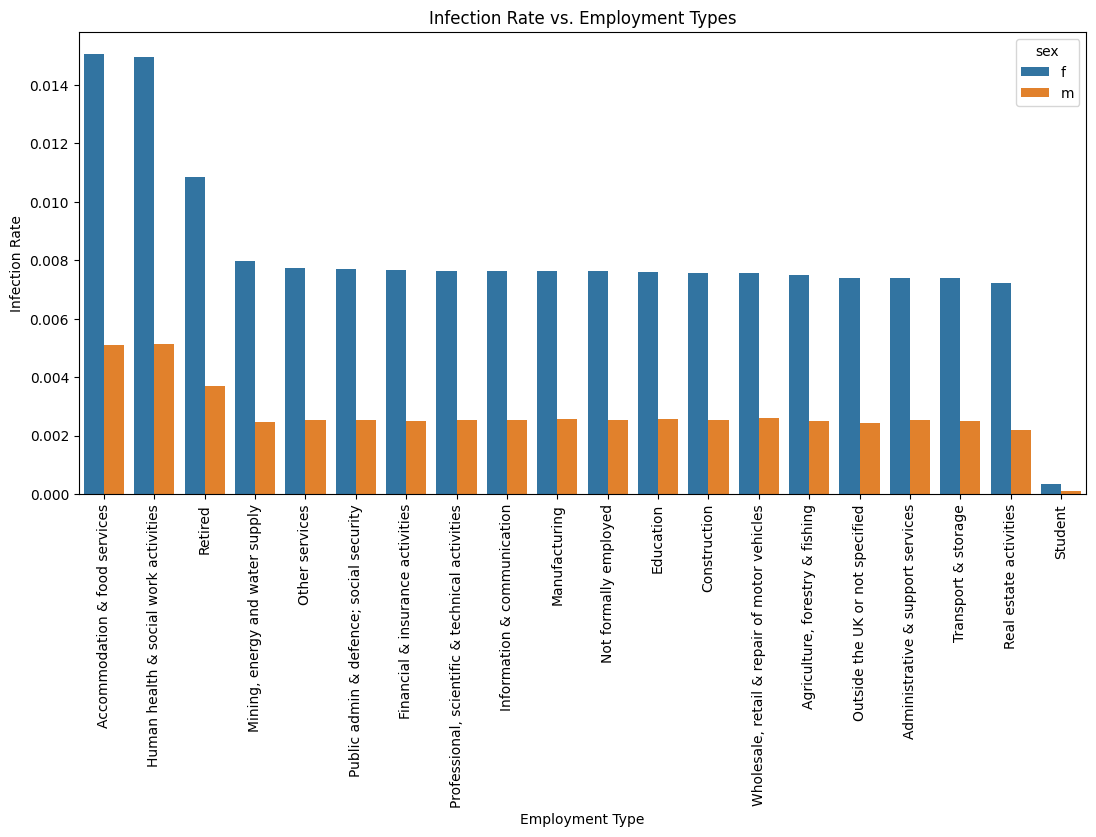

In [39]:
plt.figure(figsize=(13,6))
sns.barplot(x="Field", y="Infection Rate", hue="sex", data = merged_grouped_df_plot)
plt.xlabel("Employment Type")
plt.title("Infection Rate vs. Employment Types")
plt.xticks(rotation=90)
plt.show()

In [44]:
cux_df = cuxfilter.DataFrame(merged_grouped_df)

In [62]:


chart4 = cuxfilter.charts.bar('Field', 'Infection Rate')

#declare dashboard
d = cux_df.dashboard([chart4], layout=cuxfilter.layouts.feature_and_double_base, title='Auto Accident Dataset')

d.show(service_proxy='GoogleColab')

# d.show('https://colab.research.google.com/drive/13zF9EUpCzX_IU2mueRQvfg9dgPsEsUxL#scrollTo=Ean9eMW2eV2N')

Dashboard running at port 52657


Row
    [0] Button(button_type='success', name='open cuxfilter d...)

## Conclusion
You can see from the plot above that there is a significant effect of `sex` on `Infection Rate`. In fact, the rate of infection among females has been higher than the males across all fields. Also the subgroup with the highest infection rate was the `females` who work in `Accomodation & food services`.

<div align="center"><h2>Optional: Restart the Kernel</h2></div>

In [ ]:
# import IPython
# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}